<a href="https://colab.research.google.com/github/abhinav-exp/ELM_Implementaion/blob/main/Just_ELM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
GitHubDataLink = 'https://raw.githubusercontent.com/abhinav-exp/Forecasting-CryptoCurrency-Prices/master/Datasets/'
InputFileLink = GitHubDataLink + 'DataBTC2017.csv'
data1 = pd.read_csv(InputFileLink, header=0, index_col=0)
print(data1)

            CBBTCUSD
DATE                
2017-06-18   2515.25
2017-06-19   2596.98
2017-06-20   2725.08
2017-06-21   2643.35
2017-06-22   2679.99
...              ...
2019-08-03  10820.75
2019-08-04  10997.82
2019-08-05  11775.14
2019-08-06  11440.08
2019-08-07  12014.41

[781 rows x 1 columns]


In [3]:
data1min = data1.min()
data1max = data1.max()

normalize = lambda x: (x - data1min + 1)/(data1max - data1min + 2)
data2 = normalize(data1)
print(data2)

            CBBTCUSD
DATE                
2017-06-18  0.034073
2017-06-19  0.038680
2017-06-20  0.045901
2017-06-21  0.041294
2017-06-22  0.043360
...              ...
2019-08-03  0.502247
2019-08-04  0.512228
2019-08-05  0.556045
2019-08-06  0.537158
2019-08-07  0.569532

[781 rows x 1 columns]


In [4]:
denormalize = lambda x: (x)*np.float64(data1max - data1min + 2) + np.float64(data1min - 1)

In [5]:
def split_sequence(sequence, n_steps):
  X= list()
  for i in range(len(sequence) - n_steps):
    end_ix = i + n_steps
    seq_x= sequence.values[i:end_ix, 0]
    X.append(seq_x)
  return pd.DataFrame(X)

data3 = split_sequence(data2, 10)
print(data3.shape)
print(data3)

(771, 10)
            0         1         2         3         4         5         6  \
0    0.034073  0.038680  0.045901  0.041294  0.043360  0.043967  0.037432   
1    0.038680  0.045901  0.041294  0.043360  0.043967  0.037432  0.033530   
2    0.045901  0.041294  0.043360  0.043967  0.037432  0.033530  0.028023   
3    0.041294  0.043360  0.043967  0.037432  0.033530  0.028023  0.037484   
4    0.043360  0.043967  0.037432  0.033530  0.028023  0.037484  0.036208   
..        ...       ...       ...       ...       ...       ...       ...   
766  0.441959  0.449255  0.447073  0.426045  0.430599  0.427984  0.432307   
767  0.449255  0.447073  0.426045  0.430599  0.427984  0.432307  0.461562   
768  0.447073  0.426045  0.430599  0.427984  0.432307  0.461562  0.479501   
769  0.426045  0.430599  0.427984  0.432307  0.461562  0.479501  0.486030   
770  0.430599  0.427984  0.432307  0.461562  0.479501  0.486030  0.502247   

            7         8         9  
0    0.033530  0.028023  0.03

In [6]:
train_x = data3.iloc[:int(0.85*len(data3)), :-1]
train_y = data3.iloc[:int(0.85*len(data3)), -1:]
test_x = data3.iloc[int(0.85*len(data3)):, :-1]
test_y = data3.iloc[int(0.85*len(data3)):, -1:]
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(655, 9)
(655, 1)
(116, 9)
(116, 1)


In [7]:
class ELM(object):
    def __init__(self, inputSize, outputSize, hiddenSize):
        self.inputSize = inputSize
        self.outputSize = outputSize
        self.hiddenSize = hiddenSize
        self.weight = np.matrix(np.random.uniform(-0.5, 0.5, (self.hiddenSize, self.inputSize)))
        self.bias = np.matrix(np.random.uniform(0, 1, (1, self.hiddenSize)))
        self.H = 0
        self.beta = 0

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-1 * x))

    def predict(self, X):
        X = np.matrix(X)
        y = self.sigmoid((X * self.weight.T) + self.bias) * self.beta
        return y

    def train(self, X, y):
        X = np.matrix(X)
        y = np.matrix(y)
        self.H = (X * self.weight.T) + self.bias
        self.H = self.sigmoid(self.H)
        H_moore_penrose = np.linalg.inv(self.H.T * self.H) * self.H.T
        self.beta = H_moore_penrose * y
        return self.H * self.beta

In [8]:
elm = ELM(9, 1, 10)
elm.train(train_x,train_y)
pred_y = elm.predict(test_x)

In [17]:
pred_y[:, 0]

matrix([[0.17849348],
        [0.17874136],
        [0.182943  ],
        [0.17547848],
        [0.18493138],
        [0.18935638],
        [0.18805607],
        [0.19020582],
        [0.19154997],
        [0.19161961],
        [0.19486978],
        [0.20457342],
        [0.19746762],
        [0.18025326],
        [0.18494478],
        [0.18614018],
        [0.18138665],
        [0.18132797],
        [0.19085811],
        [0.19372469],
        [0.1945806 ],
        [0.21142889],
        [0.21692685],
        [0.21222073],
        [0.21189993],
        [0.21745369],
        [0.22788595],
        [0.23714955],
        [0.2483724 ],
        [0.30068568],
        [0.28190829],
        [0.3305045 ],
        [0.34316869],
        [0.34930966],
        [0.33517822],
        [0.30376982],
        [0.31112405],
        [0.35741262],
        [0.34172156],
        [0.33473849],
        [0.32949827],
        [0.34361212],
        [0.34589069],
        [0.34103868],
        [0.39236445],
        [0

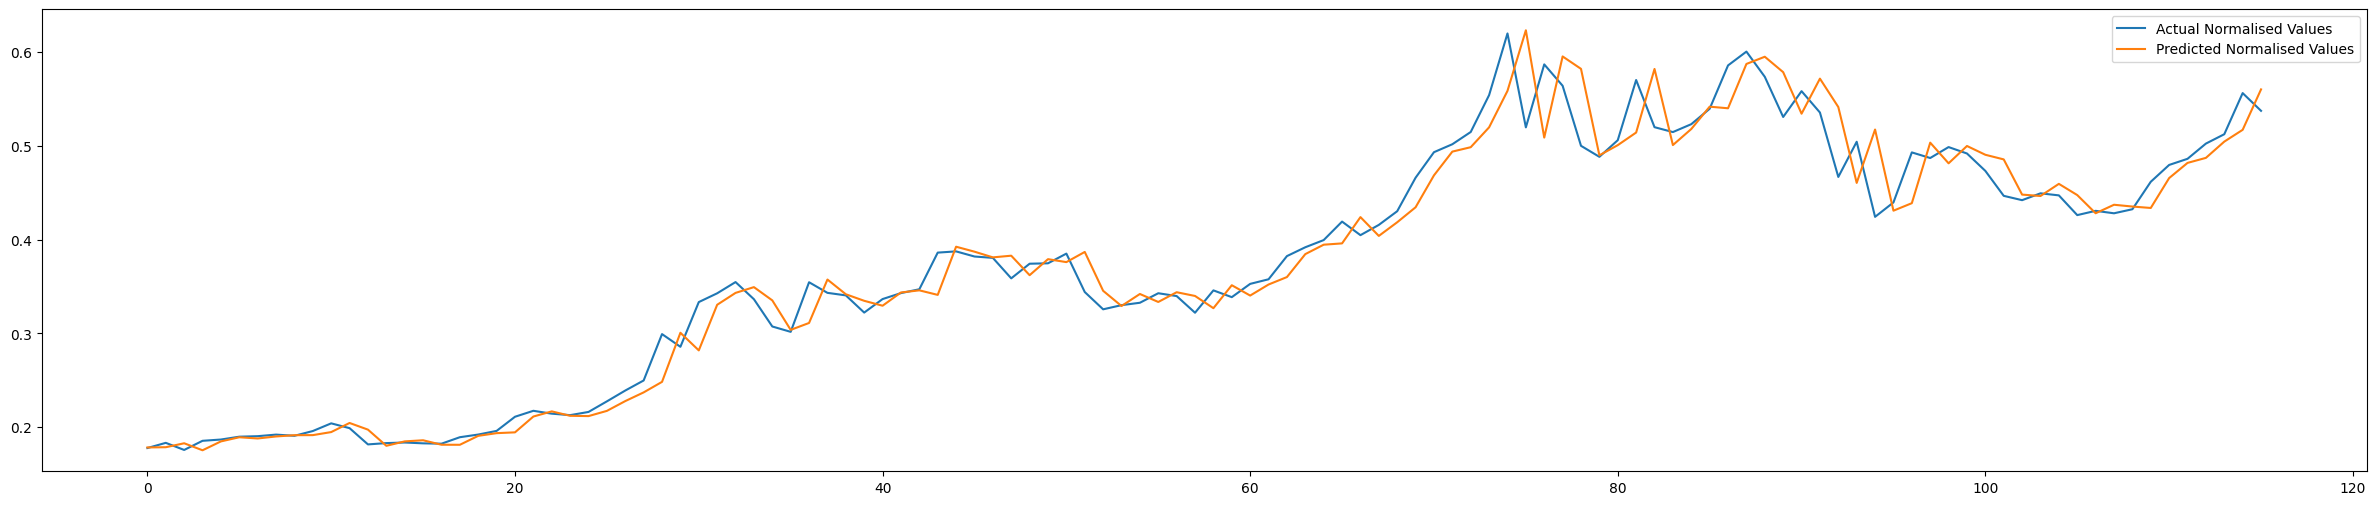

In [10]:
plt.figure(figsize=(30, 6))
plt.plot(test_y.reset_index()[9])
plt.plot(pred_y)
plt.legend(["Actual Normalised Values", "Predicted Normalised Values"])
plt.show()

In [11]:
denormalized_preds = denormalize(pred_y)
# print(denormalized_preds)
preds1 = pd.DataFrame(denormalized_preds)
preds1['DATE'] = data1.index[-1*len(preds1):]
preds1 = preds1.set_index('DATE')
print(preds1)

                       0
DATE                    
2019-04-14   5077.295447
2019-04-15   5081.692833
2019-04-16   5156.230880
2019-04-17   5023.808540
2019-04-18   5191.505140
...                  ...
2019-08-03  10455.727810
2019-08-04  10550.816384
2019-08-05  10857.801976
2019-08-06  11080.928530
2019-08-07  11845.190027

[116 rows x 1 columns]


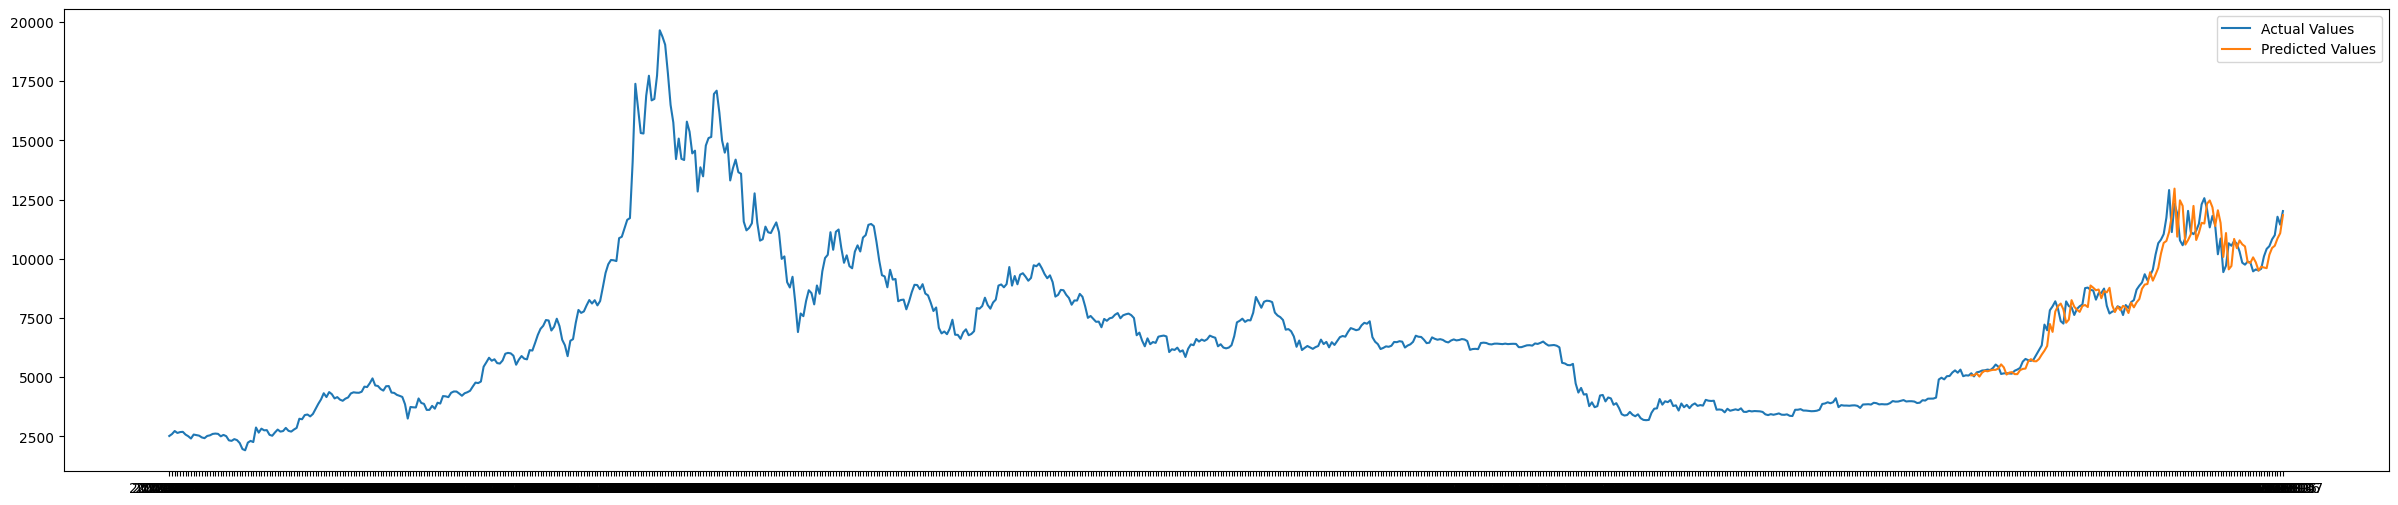

In [12]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1)
plt.legend(["Actual Values", "Predicted Values"])
plt.show()

In [13]:
mse = np.mean((np.array(preds1[0]) - np.array(data1.iloc[-1*(len(preds1)):, 0]))**2)
print("mse  "+ str(mse))
print("rmse "+ str(np.sqrt(mse)))

mse  379892.7420006558
rmse 616.3543964316762


In [14]:
np.array(test_y - pred_y)[:, 0]

array([-0.00062431,  0.0046548 , -0.00711608,  0.01009522,  0.00200081,
        0.00059099,  0.00244766,  0.00196248, -0.00063588,  0.00436545,
        0.00929725, -0.00552752, -0.0157321 ,  0.00287458, -0.00119181,
       -0.00326656,  0.00110647,  0.00806699,  0.00138122,  0.00239622,
        0.01661283,  0.00611226, -0.00243809,  0.00069195,  0.0044259 ,
        0.0101437 ,  0.01124906,  0.01269839,  0.0509005 , -0.01495207,
        0.05146676,  0.01222724,  0.01153584, -0.012889  , -0.02780283,
       -0.00210406,  0.04339334, -0.01419497, -0.00120061, -0.01254988,
        0.00709263, -0.00065715,  0.00115272,  0.04504707, -0.00496981,
       -0.00515013, -0.00053994, -0.0241378 ,  0.01221664, -0.00441034,
        0.00905978, -0.04271318, -0.019728  ,  0.0009042 , -0.00935192,
        0.00930377, -0.00409036, -0.01786327,  0.01896827, -0.01270277,
        0.01244209,  0.00558507,  0.02233154,  0.00730388,  0.00491857,
        0.02322916, -0.01923773,  0.01173201,  0.01177151,  0.03

In [15]:
err_test = np.array(test_y - pred_y)[:, 0]
mse_test = np.mean(err_test ** 2)
rmse_test = np.sqrt(mse_test)
mae_test = np.mean(np.abs(err_test))
mape_test = np.mean(np.abs(err_test) / np.array(test_y)[:, 0])
EBPN = pd.DataFrame([[mse_test, rmse_test, mae_test, mape_test]], columns = ["mse", "rmse", "mae", "mape"], index = ['BPN'])
EBPN

,mse,rmse,mae,mape
BPN,0.000772,0.02779,0.018434,0.044928
